# Importing Libraries & Loading Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('03-01-2018.csv')
df.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,01/03/2018 08:17:11,115307855,5,0,0,0,0,0,...,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000,Benign
1,0,0,01/03/2018 08:20:07,60997457,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
2,67,17,01/03/2018 08:17:18,61149019,5,0,1500,0,300,300,...,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725,Benign
3,0,0,01/03/2018 08:22:09,60997555,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
4,0,0,01/03/2018 08:24:11,61997503,3,0,0,0,0,0,...,0,999909,0,999909,999909,61000000,0,61000000,61000000,Benign


# Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331125 entries, 0 to 331124
Data columns (total 80 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Dst Port           331125 non-null  object
 1   Protocol           331125 non-null  object
 2   Timestamp          331125 non-null  object
 3   Flow Duration      331125 non-null  object
 4   Tot Fwd Pkts       331125 non-null  object
 5   Tot Bwd Pkts       331125 non-null  object
 6   TotLen Fwd Pkts    331125 non-null  object
 7   TotLen Bwd Pkts    331125 non-null  object
 8   Fwd Pkt Len Max    331125 non-null  object
 9   Fwd Pkt Len Min    331125 non-null  object
 10  Fwd Pkt Len Mean   331125 non-null  object
 11  Fwd Pkt Len Std    331125 non-null  object
 12  Bwd Pkt Len Max    331125 non-null  object
 13  Bwd Pkt Len Min    331125 non-null  object
 14  Bwd Pkt Len Mean   331125 non-null  object
 15  Bwd Pkt Len Std    331125 non-null  object
 16  Flow Byts/s        3

In [4]:
df['Label'].unique()

array(['Benign', 'Label', 'Infilteration'], dtype=object)

In [5]:
df.isnull().sum()

Dst Port         0
Protocol         0
Timestamp        0
Flow Duration    0
Tot Fwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 80, dtype: int64

In [6]:
df.describe()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
count,331125,331125,331125,331125,331125,331125,331125,331125,331125,331125,...,331125,331125.0,331125.0,331125,331125,331125.0,331125.0,331125,331125,331125
unique,20849,7,32069,159256,445,573,5599,10875,2217,200,...,19,42530.0,29430.0,41738,29809,16936.0,31026.0,8426,20452,3
top,53,6,01/03/2018 10:51:58,2,1,1,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
freq,94078,170066,2050,7258,119503,131599,76892,96519,76892,173845,...,137995,234315.0,246040.0,234315,234315,227830.0,242101.0,227830,227830,238037


In [7]:
df.columns

Index(['Dst Port', 'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
      

# Feature Selection

In [8]:
import xgboost as xg
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop(columns = ['Label', 'Timestamp'], axis = 1)
y = df['Label']

In [10]:
X

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,0,0,115307855,5,0,0,0,0,0,0,...,0,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000
1,0,0,60997457,2,0,0,0,0,0,0,...,0,0,0,0,0,0,61000000,0,61000000,61000000
2,67,17,61149019,5,0,1500,0,300,300,300,...,4,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725
3,0,0,60997555,2,0,0,0,0,0,0,...,0,0,0,0,0,0,61000000,0,61000000,61000000
4,0,0,61997503,3,0,0,0,0,0,0,...,0,0,999909,0,999909,999909,61000000,0,61000000,61000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331120,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
331121,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
331122,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
331123,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min


In [11]:
encoder = LabelEncoder()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((264900, 78), (66225, 78), (264900,), (66225,))

In [13]:
X_train

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
170826,53,17,124074,2,2,84,318,42,42,42.0,...,1,8,0.0,0.0,0,0,0.0,0.0,0,0
276521,53,17,267,1,1,30,62,30,30,30.0,...,0,8,0.0,0.0,0,0,0.0,0.0,0,0
126673,53,17,407,1,1,62,94,62,62,62.0,...,0,8,0.0,0.0,0,0,0.0,0.0,0,0
135035,443,6,10120833,10,12,1062,4978,527,0,106.2,...,5,20,119478.0,0.0,119478,119478,10000000.0,0.0,10000000,10000000
22303,443,6,119930711,18,22,1020,3867,205,0,56.66666667,...,11,20,1648693.5,2022402.469,3078748,218639,58300000,80620.07255,58400000,58300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,443,6,863952,9,7,520,2917,202,0,57.777778,...,4,20,0.0,0.0,0,0,0.0,0.0,0,0
259178,53,17,993,1,1,40,139,40,40,40.0,...,0,8,0.0,0.0,0,0,0.0,0.0,0,0
131932,1600,6,2,1,1,0,0,0,0,0.0,...,0,24,0.0,0.0,0,0,0.0,0.0,0,0
146867,3389,6,1398572,8,7,1132,1581,661,0,141.5,...,5,20,0.0,0.0,0,0,0.0,0.0,0,0


In [14]:
original_feature_names = X_train.columns
original_feature_names

Index(['Dst Port', 'Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Siz

In [15]:
X_train = pd.DataFrame(X_train).apply(pd.to_numeric, errors='coerce').values
X_test = pd.DataFrame(X_test).apply(pd.to_numeric, errors='coerce').values

print("Infinities in X_train:", np.isinf(X_train).sum())
print("Infinities in X_test:", np.isinf(X_test).sum())

threshold = 1e+100
print("Large values in X_train:", (np.abs(X_train) > threshold).sum())
print("Large values in X_test:", (np.abs(X_test) > threshold).sum())

Infinities in X_train: 3140
Infinities in X_test: 864
Large values in X_train: 3140
Large values in X_test: 864


In [16]:
X_train[np.isinf(X_train)] = np.nan
X_test[np.isinf(X_test)] = np.nan

print("Infinities in X_train:", np.isinf(X_train).sum())
print("Infinities in X_test:", np.isinf(X_test).sum())

print("Large values in X_train:", (np.abs(X_train) > threshold).sum())
print("Large values in X_test:", (np.abs(X_test) > threshold).sum())

Infinities in X_train: 0
Infinities in X_test: 0
Large values in X_train: 0
Large values in X_test: 0


In [17]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [18]:
X_train = pd.DataFrame(X_train, columns=original_feature_names)
X_test = pd.DataFrame(X_test, columns=original_feature_names)

In [19]:
X_train

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,53.0,17.0,124074.0,2.0,2.0,84.0,318.0,42.0,42.0,42.000000,...,1.0,8.0,0.0,0.000,0.0,0.0,0.0,0.00000,0.0,0.0
1,53.0,17.0,267.0,1.0,1.0,30.0,62.0,30.0,30.0,30.000000,...,0.0,8.0,0.0,0.000,0.0,0.0,0.0,0.00000,0.0,0.0
2,53.0,17.0,407.0,1.0,1.0,62.0,94.0,62.0,62.0,62.000000,...,0.0,8.0,0.0,0.000,0.0,0.0,0.0,0.00000,0.0,0.0
3,443.0,6.0,10120833.0,10.0,12.0,1062.0,4978.0,527.0,0.0,106.200000,...,5.0,20.0,119478.0,0.000,119478.0,119478.0,10000000.0,0.00000,10000000.0,10000000.0
4,443.0,6.0,119930711.0,18.0,22.0,1020.0,3867.0,205.0,0.0,56.666667,...,11.0,20.0,1648693.5,2022402.469,3078748.0,218639.0,58300000.0,80620.07255,58400000.0,58300000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264895,443.0,6.0,863952.0,9.0,7.0,520.0,2917.0,202.0,0.0,57.777778,...,4.0,20.0,0.0,0.000,0.0,0.0,0.0,0.00000,0.0,0.0
264896,53.0,17.0,993.0,1.0,1.0,40.0,139.0,40.0,40.0,40.000000,...,0.0,8.0,0.0,0.000,0.0,0.0,0.0,0.00000,0.0,0.0
264897,1600.0,6.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,24.0,0.0,0.000,0.0,0.0,0.0,0.00000,0.0,0.0
264898,3389.0,6.0,1398572.0,8.0,7.0,1132.0,1581.0,661.0,0.0,141.500000,...,5.0,20.0,0.0,0.000,0.0,0.0,0.0,0.00000,0.0,0.0


In [20]:
y_train = encoder.fit_transform(y_train)
print(y_train)

[1 1 1 ... 1 1 1]


In [21]:
model = xg.XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [22]:
importance = model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(list(importance.items()), columns=['Feature09', 'Importance09'])
importance_df = importance_df.sort_values(by = 'Importance09', ascending = False)
importance_df.to_csv('File09_XG.csv',  index = False)
importance_df.head()

,Feature09,Importance09
0,Dst Port,801.0
20,Flow IAT Min,690.0
49,Init Fwd Win Byts,500.0
2,Flow Duration,497.0
25,Fwd IAT Min,470.0


<Figure size 1000x600 with 0 Axes>

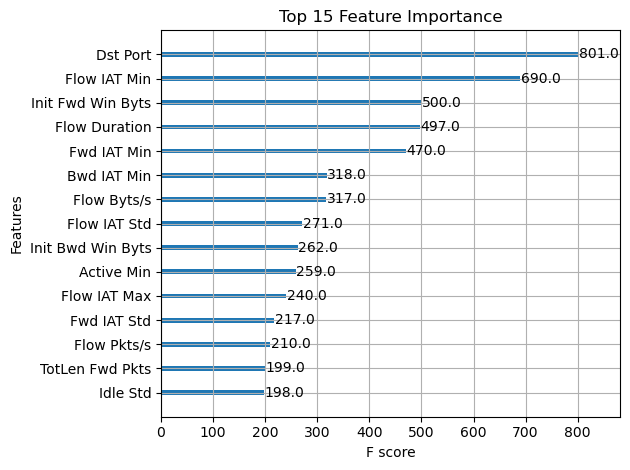

In [23]:
plt.figure(figsize=(10, 6))
xg.plot_importance(model, importance_type='weight', max_num_features=15)
plt.title('Top 15 Feature Importance')
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [24]:
labels = df['Label'].unique()

In [25]:
labels

array(['Benign', 'Label', 'Infilteration'], dtype=object)